# Datasets

# Step 1: Import Modules

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, confusion_matrix, precision_score, accuracy_score, \
mean_absolute_error, mean_squared_error, root_mean_squared_error
print('All Modules Loaded Successfully!!')

All Modules Loaded Successfully!!


# Step 2: Load data

In [8]:
df = pd.read_csv(r"C:\Users\salma\Downloads\canada_per_capita_income (1).csv")

# Step 3: Understand Data: EDA( Exploratory Data Analysis)

In [13]:
# 3.1
df.shape

(47, 2)

In [15]:
# 3.2
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [17]:
# step 3.3
df.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [19]:
# step 3.4
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [21]:
# step 3.5
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [23]:
# step 3.6 checking null values

In [25]:
df.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [27]:
# step 3.7
df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [29]:
# step 3.8
df.corr()

,year,per capita income (US$)
year,1.000000,0.943884
per capita income (US$),0.943884,1.000000


In [31]:
# # corr = 0: no correlation (x vs y)
# corr >0 +ve; corr
# corr < 0: -ve: 

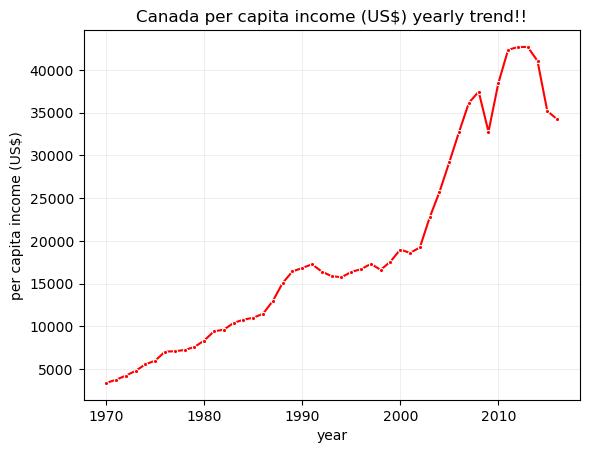

In [53]:
# step 3.9
# visuals

sns.lineplot(data = df, x  = 'year', y = 'per capita income (US$)', color = 'r',marker = '.')
plt.grid(alpha = 0.2)
plt.title('Canada per capita income (US$) yearly trend!!')
plt.show()

# Step 4: Feature Engineering

In [56]:
# step 4.1 divide data into features and target

In [58]:
X = df[['year']]
X

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


In [60]:
y = df['per capita income (US$)']
y

0      3399.299037
1      3768.297935
2      4251.175484
3      4804.463248
4      5576.514583
5      5998.144346
6      7062.131392
7      7100.126170
8      7247.967035
9      7602.912681
10     8355.968120
11     9434.390652
12     9619.438377
13    10416.536590
14    10790.328720
15    11018.955850
16    11482.891530
17    12974.806620
18    15080.283450
19    16426.725480
20    16838.673200
21    17266.097690
22    16412.083090
23    15875.586730
24    15755.820270
25    16369.317250
26    16699.826680
27    17310.757750
28    16622.671870
29    17581.024140
30    18987.382410
31    18601.397240
32    19232.175560
33    22739.426280
34    25719.147150
35    29198.055690
36    32738.262900
37    36144.481220
38    37446.486090
39    32755.176820
40    38420.522890
41    42334.711210
42    42665.255970
43    42676.468370
44    41039.893600
45    35175.188980
46    34229.193630
Name: per capita income (US$), dtype: float64

# Step 5 : Model Building And training

In [65]:
# step 5.1
model = LinearRegression()

In [67]:
# step 5.2
model.fit(X,y)  # model building/learning: Best line: GDA

LinearRegression()

In [73]:
# step 5.3
y_pred = model.predict(X)

In [75]:
# actual y: y
# predicted y: y_pred

In [77]:
temp_df = df.copy()

In [79]:
temp_df['predicted per capita'] = y_pred

In [83]:
temp_df['residual'] = temp_df['per capita income (US$)'] - temp_df['predicted per capita']

In [85]:
temp_df

,year,per capita income (US$),predicted per capita,residual
0,1970,3399.299037,-134.559667,3533.858704
1,1971,3768.297935,693.905409,3074.392526
2,1972,4251.175484,1522.370484,2728.805000
3,1973,4804.463248,2350.835559,2453.627689
4,1974,5576.514583,3179.300634,2397.213949
5,1975,5998.144346,4007.765709,1990.378637
6,1976,7062.131392,4836.230785,2225.900607
7,1977,7100.126170,5664.695860,1435.430310
8,1978,7247.967035,6493.160935,754.806100
9,1979,7602.912681,7321.626010,281.286671


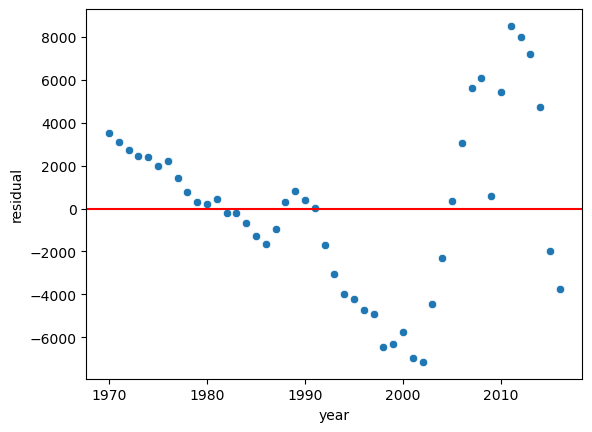

In [91]:
sns.scatterplot(data = temp_df, x= 'year', y = 'residual')
plt.axhline(0,color = 'r')

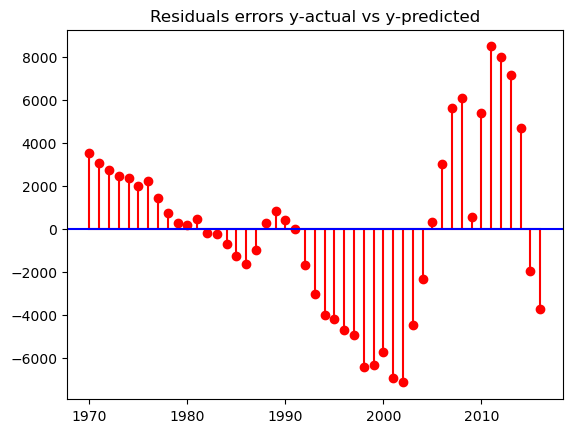

In [103]:
plt.title('Residuals errors y-actual vs y-predicted')
plt.stem(temp_df['year'], temp_df['residual'],'r')
plt.axhline(0,color = 'b')

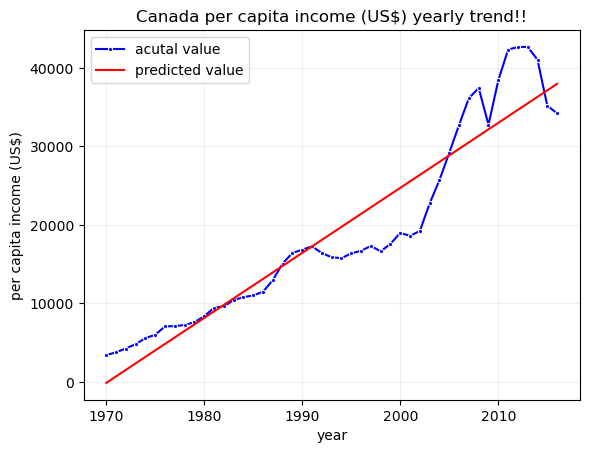

In [109]:
# step 3.9
# visuals

sns.lineplot(data = df, x  = 'year', y = 'per capita income (US$)', color = 'b',marker = '.',label = 'acutal value')
sns.lineplot(data = temp_df, x = 'year', y = 'predicted per capita', color = 'r',label = 'predicted value')
plt.legend()
plt.grid(alpha = 0.2)
plt.title('Canada per capita income (US$) yearly trend!!')
plt.show()

# Step 6: Model Evaluation

In [114]:
model.score(X,y) # learning score

0.890916917957032

In [116]:
mean_absolute_error(y, y_pred)

3088.866427771443

In [120]:
mse = mean_squared_error(y, y_pred)
mse

15462739.061504772

In [122]:
rmse = mse ** .5
rmse

3932.268945723928

In [124]:
root_mean_squared_error(y, y_pred)

3932.268945723928

# Step 7: Model Hyper Tune

# Step 8: Best Model Find

# Step 9 Best Model Save

# Step 10: Model Deploy